In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import folium
from IPython.display import display
import torch
import torch.optim as optim

In [3]:
pio.renderers.default = 'notebook_connected'

In [4]:
plt.style.use("ggplot")

In [5]:
df = pd.read_csv('jeju_bus.csv')
df

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [6]:
df['now_arrive_time']

0         06시
1         06시
2         06시
3         06시
4         07시
         ... 
210452    21시
210453    21시
210454    21시
210455    21시
210456    21시
Name: now_arrive_time, Length: 210457, dtype: object

In [7]:
df['now_arrive_time'].str.replace('시', '')

0         06
1         06
2         06
3         06
4         07
          ..
210452    21
210453    21
210454    21
210455    21
210456    21
Name: now_arrive_time, Length: 210457, dtype: object

In [8]:
df['now_arrive_time'].str.replace('시', '').astype(int)

0          6
1          6
2          6
3          6
4          7
          ..
210452    21
210453    21
210454    21
210455    21
210456    21
Name: now_arrive_time, Length: 210457, dtype: int32

In [9]:
df['hour'] = df['now_arrive_time'].str.replace('시', '').astype(int)
df

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,6
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,6
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96,21
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50,21
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16,21
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38,21


In [10]:
df['speed'] = df['distance'] / df['next_arrive_time']
df

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hour,speed
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,6,11.083333
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,6,9.250000
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,6,10.375000
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,6,13.761905
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7,5.843750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96,21,5.500000
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50,21,5.600000
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16,21,7.125000
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38,21,5.868421


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                210457 non-null  int64  
 1   date              210457 non-null  object 
 2   route_id          210457 non-null  int64  
 3   vh_id             210457 non-null  int64  
 4   route_nm          210457 non-null  object 
 5   now_latitude      210457 non-null  float64
 6   now_longitude     210457 non-null  float64
 7   now_station       210457 non-null  object 
 8   now_arrive_time   210457 non-null  object 
 9   distance          210457 non-null  float64
 10  next_station      210457 non-null  object 
 11  next_latitude     210457 non-null  float64
 12  next_longitude    210457 non-null  float64
 13  next_arrive_time  210457 non-null  int64  
 14  hour              210457 non-null  int32  
 15  speed             210457 non-null  float64
dtypes: float64(6), int32

In [12]:
df.describe()

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time,hour,speed
count,210457.000000,2.104570e+05,2.104570e+05,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000
mean,105228.000000,4.052491e+08,7.988694e+06,33.434528,126.603451,490.256100,33.434711,126.603687,85.380824,13.785990,6.887892
std,60753.847139,9.132404e+04,6.774077e+03,0.102350,0.123961,520.563932,0.102224,0.123838,85.051170,4.682768,3.529959
min,0.000000,4.051360e+08,7.983000e+06,33.244382,126.473300,97.000000,33.244382,126.473300,6.000000,0.000000,0.064694
25%,52614.000000,4.051365e+08,7.983093e+06,33.325283,126.523900,291.000000,33.325283,126.524550,44.000000,10.000000,4.127273
50%,105228.000000,4.053201e+08,7.983431e+06,33.484667,126.551050,384.000000,33.484860,126.551050,66.000000,14.000000,6.330000
75%,157842.000000,4.053201e+08,7.997041e+06,33.500197,126.650322,542.000000,33.500228,126.650322,102.000000,18.000000,9.085938
max,210456.000000,4.053281e+08,7.997124e+06,33.556167,126.935188,7461.000000,33.556167,126.935188,2996.000000,23.000000,27.978261


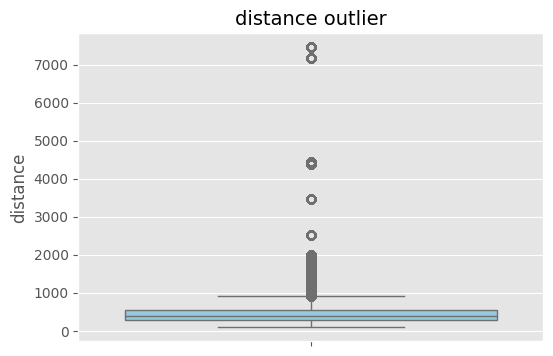

In [13]:
plt.figure(figsize=(6,4))

sns.boxplot(y=df["distance"], color='skyblue')

plt.title('distance outlier', fontsize=14)

plt.ylabel("distance")

plt.show()

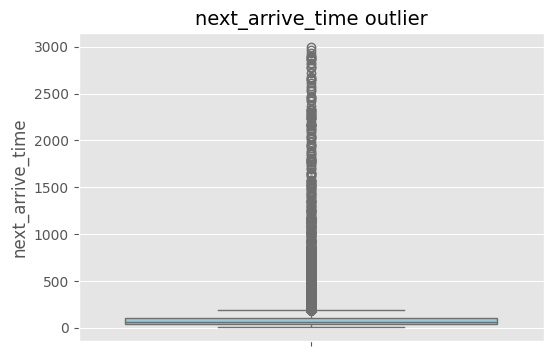

In [14]:
plt.figure(figsize=(6,4))

sns.boxplot(y=df["next_arrive_time"], color='skyblue')

plt.title('next_arrive_time outlier', fontsize=14)

plt.ylabel("next_arrive_time")

plt.show()

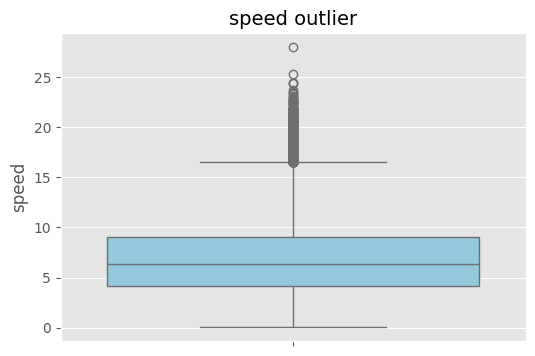

In [15]:
plt.figure(figsize=(6,4))

sns.boxplot(y=df["speed"], color='skyblue')

plt.title('speed outlier', fontsize=14)

plt.ylabel("speed")

plt.show()

In [17]:
cols= ['distance', 'next_arrive_time', 'hour', 'speed']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

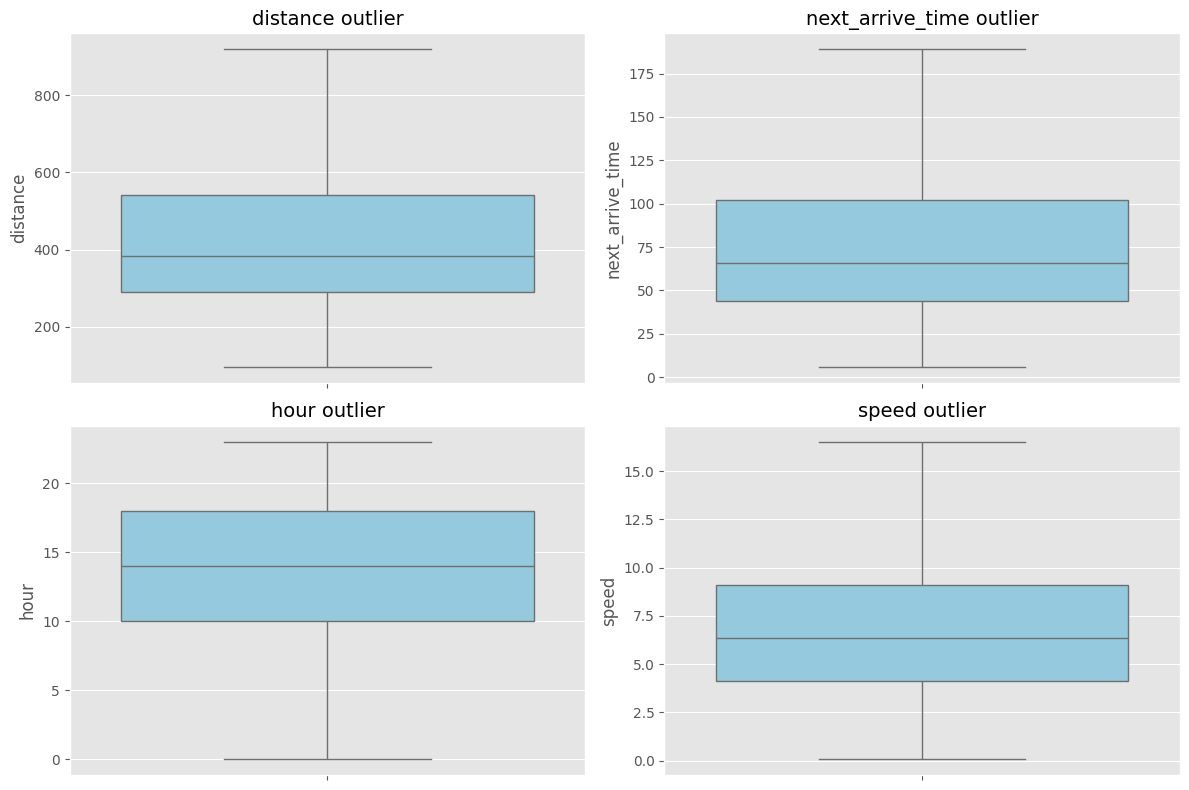

In [18]:
cols_to_plot = ['distance', 'next_arrive_time', 'hour', 'speed']

plt.figure(figsize=(12, 8))

for idx, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 2, idx)

    sns.boxplot(y=df[col], color='skyblue')

    plt.title(f'{col} outlier', fontsize=14)

    plt.ylabel(col)

plt.tight_layout()

plt.show()

In [20]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time,hour,speed
0,0,405136001,7997025,33.456267,126.551750,266.0,33.457724,126.554014,24,6,11.083333
1,1,405136001,7997025,33.457724,126.554014,333.0,33.458783,126.557353,36,6,9.250000
2,2,405136001,7997025,33.458783,126.557353,415.0,33.459893,126.561624,40,6,10.375000
3,3,405136001,7997025,33.479705,126.543811,578.0,33.484860,126.542928,42,6,13.761905
4,4,405136001,7997025,33.485662,126.494923,374.0,33.485822,126.490897,64,7,5.843750
...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,405328102,7983486,33.255783,126.577450,528.0,33.251896,126.574417,96,21,5.500000
210453,210453,405328102,7983486,33.248595,126.568527,280.0,33.249753,126.565959,50,21,5.600000
210454,210454,405328102,7983486,33.251891,126.560303,114.0,33.251084,126.559551,16,21,7.125000
210455,210455,405328102,7983486,33.251084,126.559551,223.0,33.249504,126.558068,38,21,5.868421


In [21]:
corr_matrix = numeric_df.corr()
corr_matrix

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time,hour,speed
id,1.000000,0.070271,-0.069053,-0.033693,0.028164,0.005924,-0.033395,0.027867,-0.017654,0.025857,0.024088
route_id,0.070271,1.000000,-0.998641,-0.432923,0.555106,0.121910,-0.431895,0.552970,-0.238076,0.007603,0.338925
vh_id,-0.069053,-0.998641,1.000000,0.421832,-0.579469,-0.120384,0.420799,-0.577379,0.243466,-0.006668,-0.342974
now_latitude,-0.033693,-0.432923,0.421832,1.000000,-0.083973,-0.018942,0.998971,-0.085858,0.167976,-0.010887,-0.188539
now_longitude,0.028164,0.555106,-0.579469,-0.083973,1.000000,0.153731,-0.082066,0.999531,-0.177942,-0.012707,0.338618
distance,0.005924,0.121910,-0.120384,-0.018942,0.153731,1.000000,-0.015667,0.153128,0.420708,-0.001808,0.408078
next_latitude,-0.033395,-0.431895,0.420799,0.998971,-0.082066,-0.015667,1.000000,-0.083894,0.169284,-0.010949,-0.186734
next_longitude,0.027867,0.552970,-0.577379,-0.085858,0.999531,0.153128,-0.083894,1.000000,-0.178025,-0.013694,0.338278
next_arrive_time,-0.017654,-0.238076,0.243466,0.167976,-0.177942,0.420708,0.169284,-0.178025,1.000000,-0.003822,-0.520625
hour,0.025857,0.007603,-0.006668,-0.010887,-0.012707,-0.001808,-0.010949,-0.013694,-0.003822,1.000000,0.010747


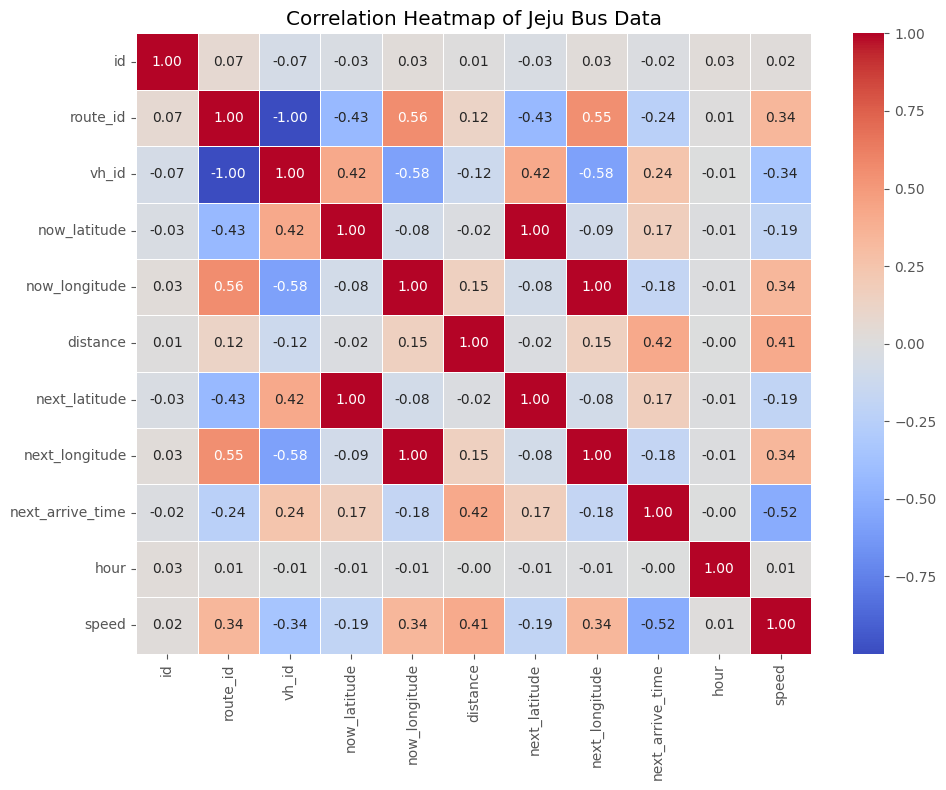

In [22]:
plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5
           )

plt.title('Correlation Heatmap of Jeju Bus Data')

plt.tight_layout()

plt.show()